In [1]:
#Numerical computing packages
import numpy as np
import pandas as pd
import scipy
from scipy.stats import norm
from scipy import stats
from numpy.random import choice
np.random.seed(99)

#visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
from _plotly_future_ import v4_subplots
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
import plotly as pl
import missingno as msno

#ML packages
import sklearn
import sklearn.linear_model as linear_model
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import category_encoders


#jupyter notebook specfic packges
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML, display
pd.options.display.max_columns = None

In [2]:
%store -r newdf

In [3]:
df=newdf.copy()

In [4]:
df.dtypes

p_gen         object
p_yr         float64
p_race        object
p_milt        object
p_born        object
p_citz        object
p_edu          int64
p_marl        object
p_pre         object
p_ilang       object
p_iprox       object
p_intrp       object
mec_lang      object
mec_prox      object
mec_intrp     object
aca_lang      object
bmi          float64
dtype: object

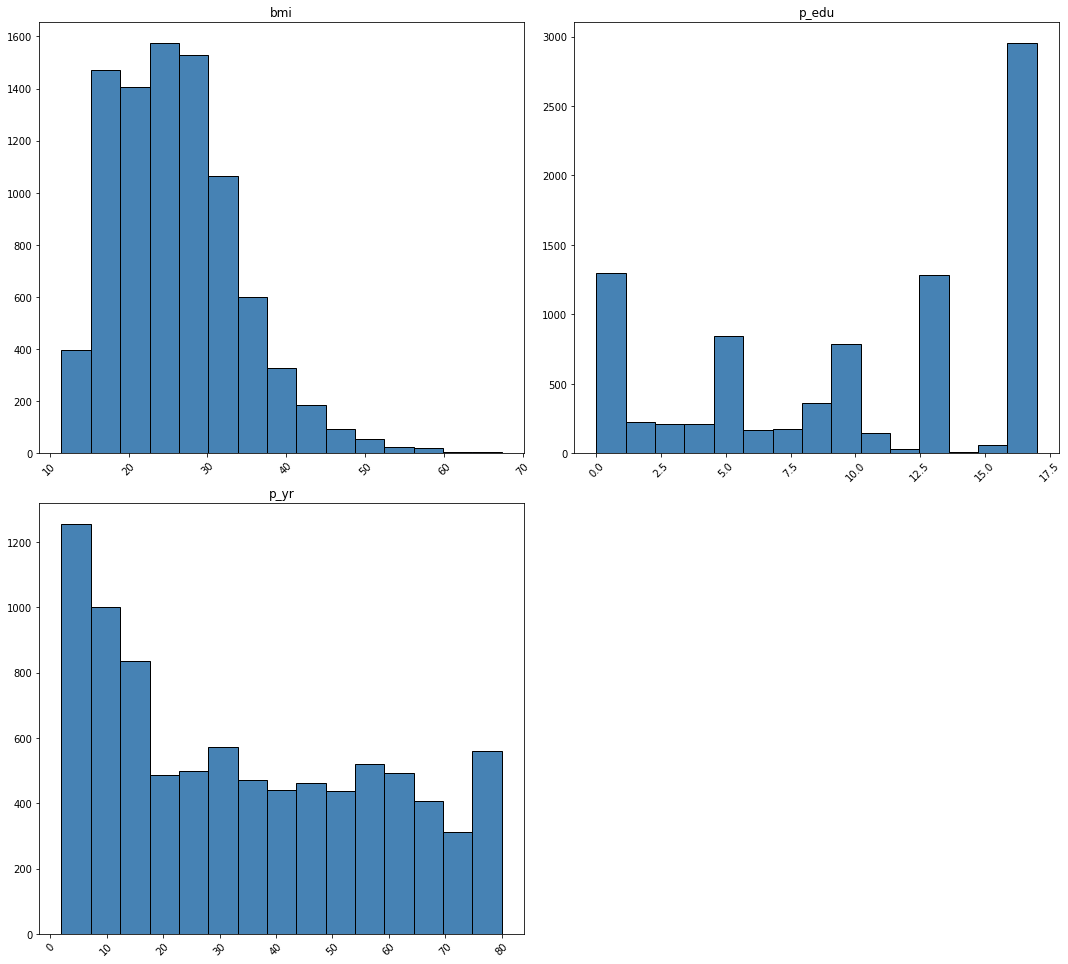

In [5]:
# 1D uni-variate analysis
# histogram 
# as we can see the bmi is rightly skewed
# There are lot many people who have completed education and are degree holders or college grads
# persons when compared to each decade of years there are more in 10-20 and 20-30 range.
fig =df.hist(bins=15,color='steelblue',edgecolor='black',linewidth=1.0,xlabelsize=10,ylabelsize=10,
               xrot=45,yrot=0,figsize=(10,9),grid=False)

plt.tight_layout(rect=(0,0,1.5,1.5))

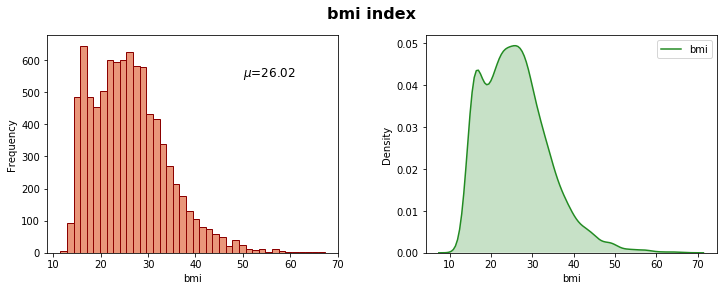

In [6]:
fig = plt.figure( figsize=(12,4) )
title = fig.suptitle("bmi index", fontsize=16, fontweight='bold')
fig.subplots_adjust(top=0.88, wspace=0.3)

#===========#
# Histogram #
#===========#
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel("bmi")
ax1.set_ylabel("Frequency")

ax1.text(x=50, y=550, 
         s=r'$\mu$='+str(round(df['bmi'].mean(),2)), 
         fontsize=12)

freq, bins, patches = ax1.hist(df['bmi'], 
                               bins=40,
                               color='darksalmon',
                               edgecolor='darkred', linewidth=1)

#Bonus: Uncomment the line ax2 = ax1.twinx() to merge the histogram with the density plot. 

#==============#
# Density Plot #
#==============#
ax2 = fig.add_subplot(1,2,2) 
#ax2 = ax1.twinx() # https://youtu.be/OebyvmZo3w0?t=1m42s
ax2.set_xlabel("bmi")
ax2.set_ylabel("Density") 
sns.kdeplot(df['bmi'], ax=ax2, shade=True, color='forestgreen')

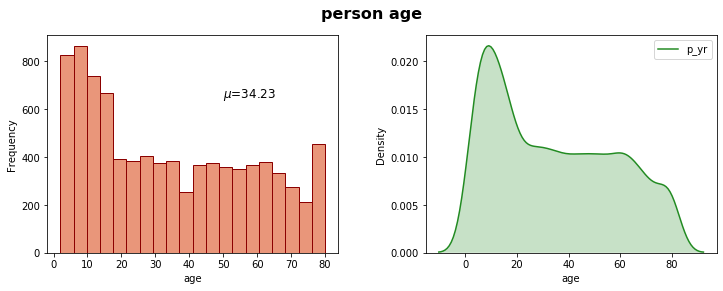

In [7]:
# the mean age of person's are about 34

fig = plt.figure( figsize=(12,4) )
title = fig.suptitle("person age", fontsize=16, fontweight='bold')
fig.subplots_adjust(top=0.88, wspace=0.3)

#===========#
# Histogram #
#===========#
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel("age")
ax1.set_ylabel("Frequency")

ax1.text(x=50, y=650, 
         s=r'$\mu$='+str(round(df['p_yr'].mean(),2)), 
         fontsize=12)

freq, bins, patches = ax1.hist(df['p_yr'], 
                               bins=20,
                               color='darksalmon',
                               edgecolor='darkred', linewidth=1)

#Bonus: Uncomment the line ax2 = ax1.twinx() to merge the histogram with the density plot. 

#==============#
# Density Plot #
#==============#
ax2 = fig.add_subplot(1,2,2) 
#ax2 = ax1.twinx() # https://youtu.be/OebyvmZo3w0?t=1m42s
ax2.set_xlabel("age")
ax2.set_ylabel("Density") 
sns.kdeplot(df['p_yr'], ax=ax2, shade=True, color='forestgreen')

Text(0, 0.5, 'count of families')

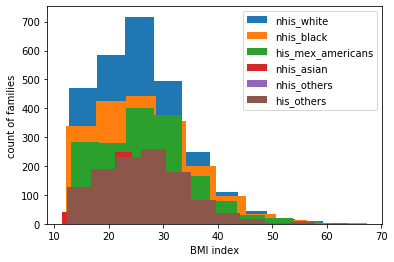

In [8]:
# BMI more then 25 is generally over weight 
#BMI between 18.5 to 24.9 is ideal
#3BMI less then 18.5 is under weight

# so let us just add bmi as cateogrical
def bmitocategory(x):
    if x<18.5:
        return 'under weight'
    if x>25:
        return 'over weight'
    else:
        return 'ideal'
df['bmic']=df['bmi'].apply(lambda x:bmitocategory(x))


for each in df['p_race'].unique():
    plt.hist(df[df['p_race']==each]['bmi'],label=each)
    plt.legend()
plt.xlabel('BMI index')
plt.ylabel('count of families')

# most number of people fall above 25 range
# under weight and over weight people are more when compared to ideal weight people

Text(0.5, 0.98, 'Person Attributes Correlation Heatmap')

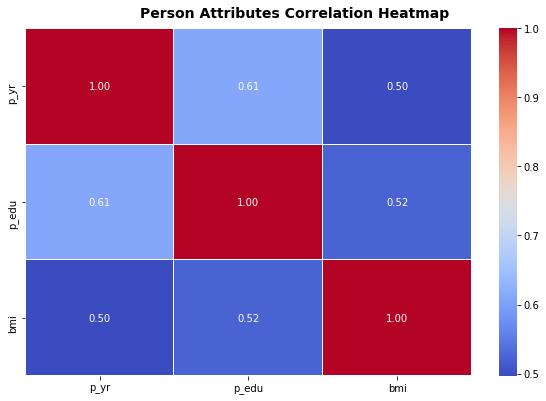

In [9]:
#2D visualizing of data
#bi variate analysis
corr=df.corr()
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Person Attributes Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

# person year and education are correlated with bmi
# year shows about 50% variation in bmi
#education shows about 61% variation in bmi

Text(0.5, 0.98, 'person  Attributes Pairwise Plots')

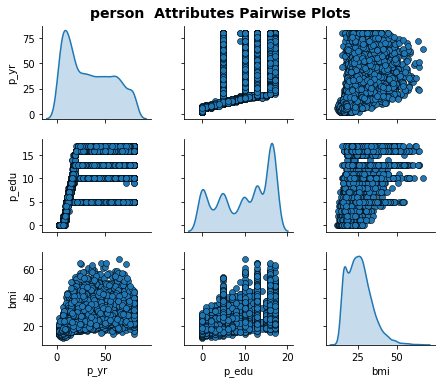

In [10]:
# scatter plots 
#scatter plots

# Attributes of interest
cols = ['p_yr','p_edu','bmi']

pp = sns.pairplot(df[cols], 
                  height=1.8, aspect=1.2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kws=dict(shade=True), # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde") # use "kde" for diagonal plots

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('person  Attributes Pairwise Plots', 
              fontsize=14, fontweight='bold')

# also plot lm plots
# so let's color those scatter plots to see who fall in what range

Text(0.5, 0.98, 'person Attributes Pairwise Plots')

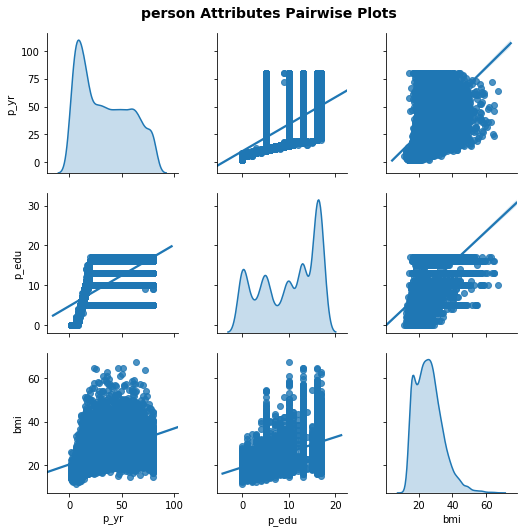

In [11]:
#linear regresion

pp = sns.pairplot(df[cols],diag_kws=dict(shade=True), 
                  diag_kind="kde", # use "kde" for diagonal plots
                  kind="reg" )  
    # <== 😀 linear regression to the scatter plots

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('person Attributes Pairwise Plots', fontsize=14, fontweight='bold')

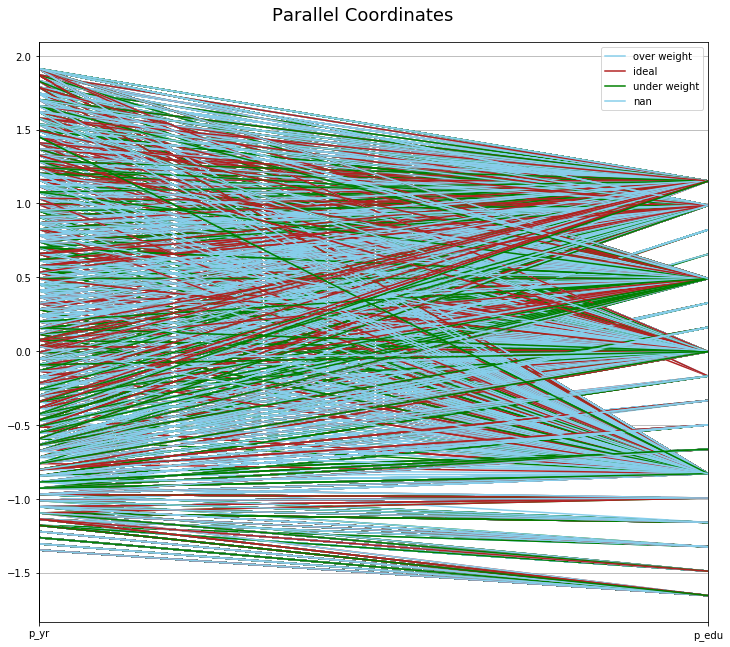

In [12]:
# parallel co-ordinates [scaled data only]

# Attributes of interest
subset_df = df[['p_yr','p_edu']]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=['p_yr','p_edu'])
tempdfbmi = pd.concat([scaled_df, df['bmic']], axis=1)
tempdfbmi.head()

from pandas.plotting import parallel_coordinates

fig = plt.figure(figsize=(12, 10))
title = fig.suptitle("Parallel Coordinates", fontsize=18)
fig.subplots_adjust(top=0.93, wspace=0)

pc = parallel_coordinates(tempdfbmi, 
                          'bmic', 
                        color=('skyblue', 'firebrick','green') )

# we can see over weight colour all around but difficult to understand trend between years and person educated

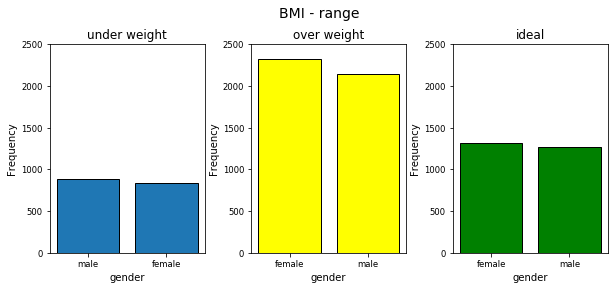

In [13]:
# 2d - 2 categorical discrete attributes

#2 Categorical discrete attributs

fig = plt.figure(figsize=(10,4))
title = fig.suptitle("BMI - range", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,3,1)
ax1.set_title("under weight")
ax1.set_xlabel("gender")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0,2500])
rw_q = df[df['bmic']=='under weight']['p_gen'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], 
               edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,3,2)
ax2.set_title("over weight")
ax2.set_xlabel("gender")
ax2.set_ylabel("Frequency") 
ax2.set_ylim([0,2500])
ww_q = df[df['bmic']=='over weight']['p_gen'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='yellow', 
               edgecolor='black', linewidth=1)

ax3 = fig.add_subplot(1,3,3)
ax3.set_title("ideal")
ax3.set_xlabel("gender")
ax3.set_ylabel("Frequency") 
ax3.set_ylim([0,2500])
ww_q = df[df['bmic']=='ideal']['p_gen'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax3.tick_params(axis='both', which='major', labelsize=8.5)
bar3 = ax3.bar(ww_q[0], ww_q[1], color='green', 
               edgecolor='black', linewidth=1)

# under weight more number of male compared to female
#over weight and ideal slightly more number of female compared to male

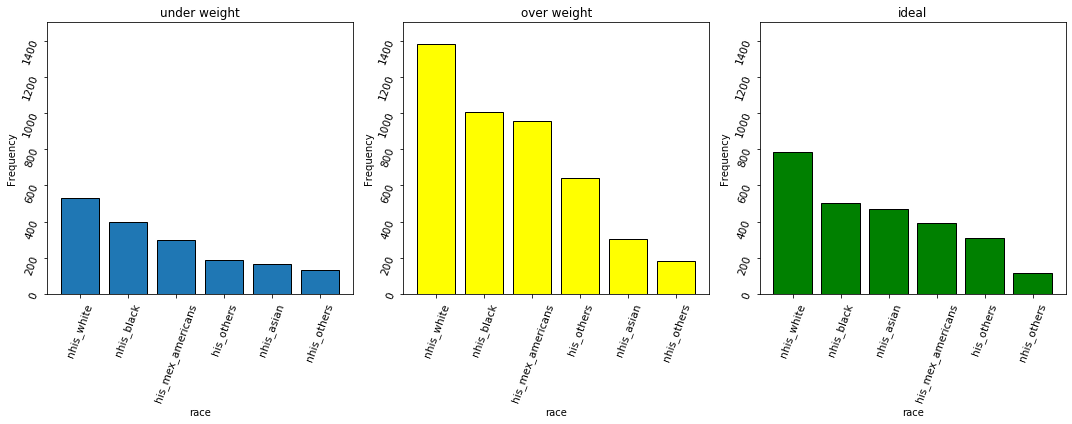

In [14]:
# 2d - 2 categorical discrete attributes

#2 Categorical discrete attributs

fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,3,1)
ax1.set_title("under weight")
ax1.set_xlabel("race")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0,1500])
rw_q = df[df['bmic']=='under weight']['p_race'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.tick_params(axis='both', which='major', labelsize=10.5,rotation=70)
bar1 = ax1.bar(rw_q[0], rw_q[1], 
               edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,3,2)
ax2.set_title("over weight")
ax2.set_xlabel("race")
ax2.set_ylabel("Frequency") 
ax2.set_ylim([0,1500])
ww_q = df[df['bmic']=='over weight']['p_race'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.tick_params(axis='both', which='major', labelsize=10.5,rotation=70)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='yellow', 
               edgecolor='black', linewidth=1)

ax3 = fig.add_subplot(1,3,3)
ax3.set_title("ideal")
ax3.set_xlabel("race")
ax3.set_ylabel("Frequency") 
ax3.set_ylim([0,1500])
ww_q = df[df['bmic']=='ideal']['p_race'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax3.tick_params(axis='both', which='major', labelsize=10.5,rotation=70)
bar3 = ax3.bar(ww_q[0], ww_q[1], color='green', 
               edgecolor='black', linewidth=1)

# under weight and over weight follow same trend
#ideal asians are slighlty more number compared to hispanics
#over weight and ideal slightly more number of female compared to male
fig.tight_layout(rect=(0,0,1.5,1.5))


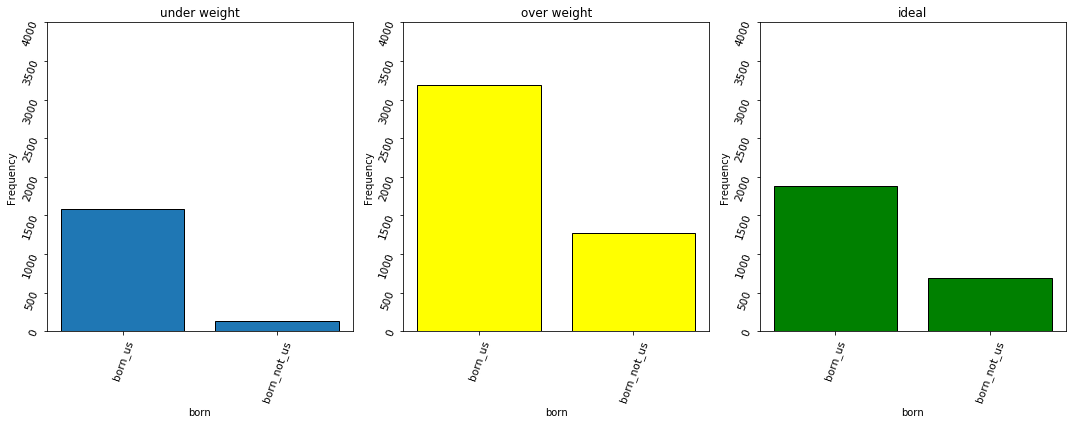

In [15]:
# 2d - 2 categorical discrete attributes

#2 Categorical discrete attributs

fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,3,1)
ax1.set_title("under weight")
ax1.set_xlabel("born")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0,4000])
rw_q = df[df['bmic']=='under weight']['p_born'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.tick_params(axis='both', which='major', labelsize=10.5,rotation=70)
bar1 = ax1.bar(rw_q[0], rw_q[1], 
               edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,3,2)
ax2.set_title("over weight")
ax2.set_xlabel("born")
ax2.set_ylabel("Frequency") 
ax2.set_ylim([0,4000])
ww_q = df[df['bmic']=='over weight']['p_born'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.tick_params(axis='both', which='major', labelsize=10.5,rotation=70)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='yellow', 
               edgecolor='black', linewidth=1)

ax3 = fig.add_subplot(1,3,3)
ax3.set_title("ideal")
ax3.set_xlabel("born")
ax3.set_ylabel("Frequency") 
ax3.set_ylim([0,4000])
ww_q = df[df['bmic']=='ideal']['p_born'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax3.tick_params(axis='both', which='major', labelsize=10.5,rotation=70)
bar3 = ax3.bar(ww_q[0], ww_q[1], color='green', 
               edgecolor='black', linewidth=1)

# people born in us are slightly more in the sample
#but there is huge difference in all three categories.
#for people born in us leading is overweight, ideal and under weight
# for people not born in us leading is overweight, ideal and uder weight
fig.tight_layout(rect=(0,0,1.5,1.5))


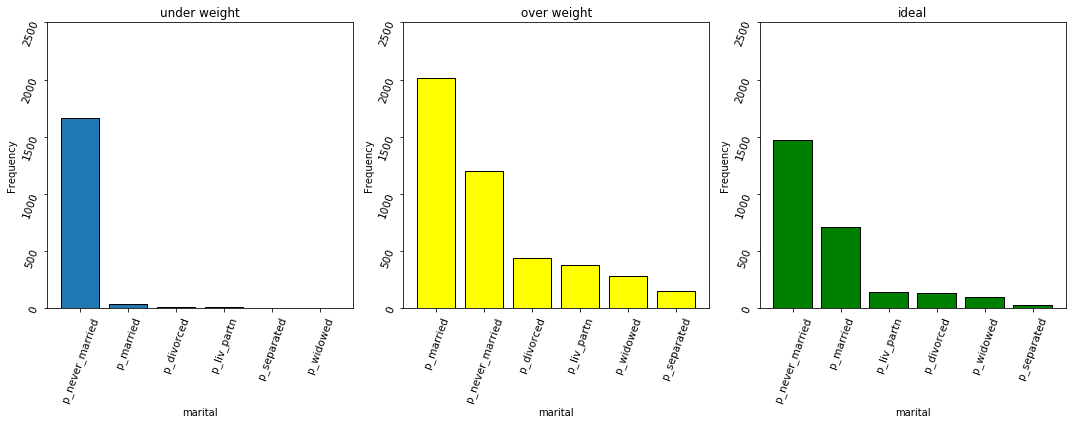

In [16]:
# 2d - 2 categorical discrete attributes

#2 Categorical discrete attributs

fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,3,1)
ax1.set_title("under weight")
ax1.set_xlabel("marital")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0,2500])
rw_q = df[df['bmic']=='under weight']['p_marl'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.tick_params(axis='both', which='major', labelsize=10.5,rotation=70)
bar1 = ax1.bar(rw_q[0], rw_q[1], 
               edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,3,2)
ax2.set_title("over weight")
ax2.set_xlabel("marital")
ax2.set_ylabel("Frequency") 
ax2.set_ylim([0,2500])
ww_q = df[df['bmic']=='over weight']['p_marl'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.tick_params(axis='both', which='major', labelsize=10.5,rotation=70)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='yellow', 
               edgecolor='black', linewidth=1)

ax3 = fig.add_subplot(1,3,3)
ax3.set_title("ideal")
ax3.set_xlabel("marital")
ax3.set_ylabel("Frequency") 
ax3.set_ylim([0,2500])
ww_q = df[df['bmic']=='ideal']['p_marl'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax3.tick_params(axis='both', which='major', labelsize=10.5,rotation=70)
bar3 = ax3.bar(ww_q[0], ww_q[1], color='green', 
               edgecolor='black', linewidth=1)


fig.tight_layout(rect=(0,0,1.5,1.5))


# persons who are never married are more in under weight and ideal categories [people don't cook I think]
#persons who are 

In [17]:
# now let's do cross tabulation to see if there are any trends which effect the BMI [trend analysis]
# let's do Gender vs race
#gender vs marital
#gender vs born
#race vs born 
#race vs marl
#born vs marl



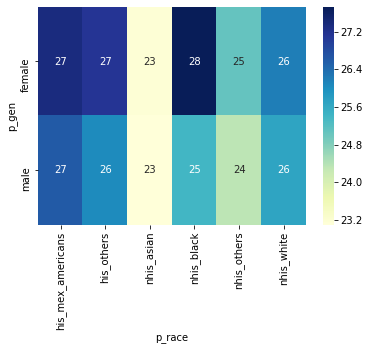

In [18]:
# gender vs race
# the asians are on average under weight
# the mexican americans and hispanic and black are over weight on average
# the whites are on average overweight to ideal
sns.heatmap(pd.crosstab(df.p_gen,df.p_race,values=df.bmi,aggfunc='mean'),cmap="YlGnBu", annot=True, cbar=True)

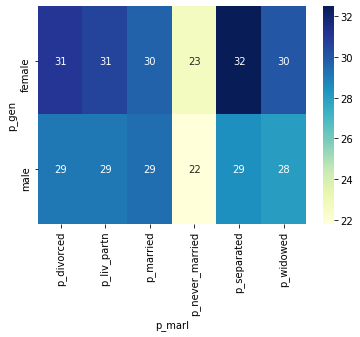

In [19]:
# gender vs marital
#people who are not married are under weight
# people who are married, living with partner, divorced or widowed all are over weight
sns.heatmap(pd.crosstab(df.p_gen,df.p_marl,values=df.bmi,aggfunc='mean'),cmap="YlGnBu", annot=True, cbar=True)

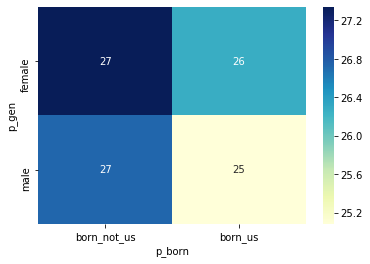

In [20]:
# gender vs born
#people born in us are on avergae ideal weights 
# people not born in us are mostly over weight 
# people who are married, living with partner, divorced or widowed all are over weight
sns.heatmap(pd.crosstab(df.p_gen,df.p_born,values=df.bmi,aggfunc='mean'),cmap="YlGnBu", annot=True, cbar=True)

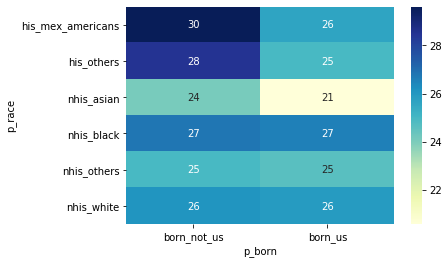

In [21]:
# race vs born
#the trend says no matter what the race is, if person born in us on average they are ideal to over weight
# if person not born in US mostly all of them are over weights except asians
sns.heatmap(pd.crosstab(df.p_race,df.p_born,values=df.bmi,aggfunc='mean'),cmap="YlGnBu", annot=True, cbar=True)

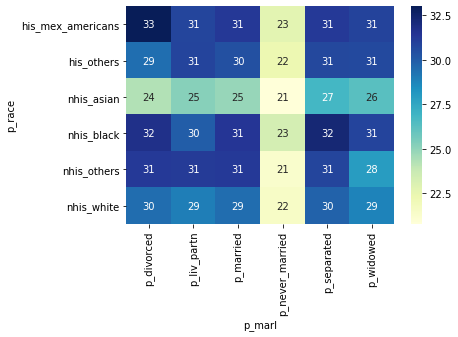

In [22]:
# race vs marl
#people never married are under weight to ideal
#asians on average are under weight to ideal
#persons who are never married are mostly under weight to ideal
#rest of them are all over weight
sns.heatmap(pd.crosstab(df.p_race,df.p_marl,values=df.bmi,aggfunc='mean'),cmap="YlGnBu", annot=True, cbar=True)

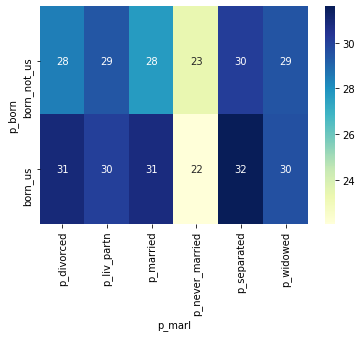

In [23]:
# born vs marl

sns.heatmap(pd.crosstab(df.p_born,df.p_marl,values=df.bmi,aggfunc='mean'),cmap="YlGnBu", annot=True, cbar=True)

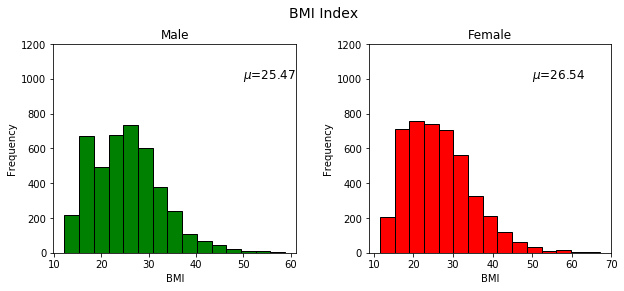

In [24]:
# 2D mixed attributes
# BMI distribution in genders, race, born ,marital
#genders
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("BMI Index", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Male")
ax1.set_xlabel("BMI")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])
ax1.text(50, 1000, r'$\mu$='+str(round(df[df['p_gen']=='male']['bmi'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist( df[df['p_gen']=='male']['bmi'], color='green', bins=15,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Female")
ax2.set_xlabel("BMI")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])
ax2.text(50, 1000, r'$\mu$='+str(round(df[df['p_gen']=='female']['bmi'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(df[df['p_gen']=='female']['bmi'], color='red', bins=15,
                                     edgecolor='black', linewidth=1)

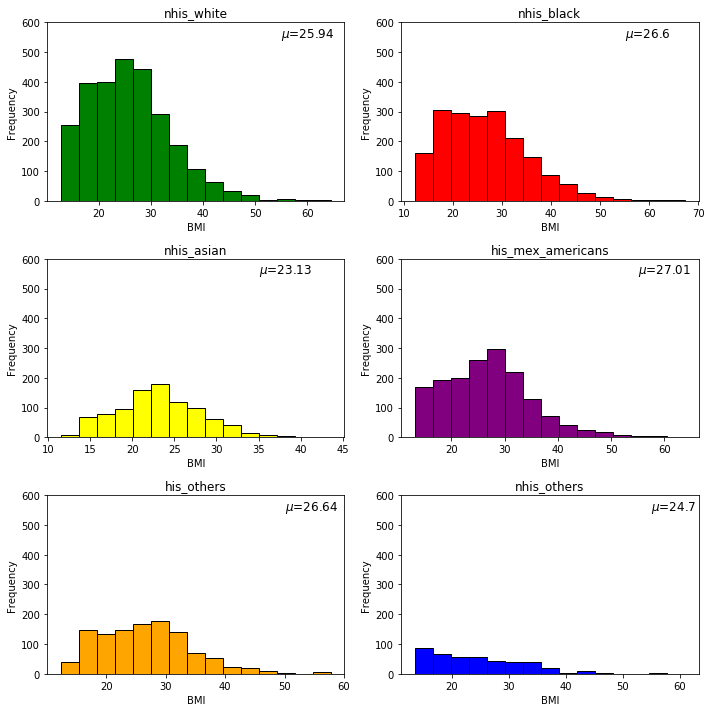

In [25]:
# 2D mixed attributes
# BMI distribution in race
#
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(3,2,1)
ax1.set_title("nhis_white")
ax1.set_xlabel("BMI")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 600])
ax1.text(55, 550, r'$\mu$='+str(round(df[df['p_race']=='nhis_white']['bmi'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist( df[df['p_race']=='nhis_white']['bmi'], color='green', bins=15,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(3,2,2)
ax2.set_title("nhis_black")
ax2.set_xlabel("BMI")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 600])
ax2.text(55, 550, r'$\mu$='+str(round(df[df['p_race']=='nhis_black']['bmi'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(df[df['p_race']=='nhis_black']['bmi'], color='red', bins=15,
                                     edgecolor='black', linewidth=1)

ax1 = fig.add_subplot(3,2,3)
ax1.set_title("nhis_asian")
ax1.set_xlabel("BMI")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 600])
ax1.text(35, 550, r'$\mu$='+str(round(df[df['p_race']=='nhis_asian']['bmi'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist( df[df['p_race']=='nhis_asian']['bmi'], color='yellow', bins=15,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(3,2,4)
ax2.set_title("his_mex_americans")
ax2.set_xlabel("BMI")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 600])
ax2.text(55, 550, r'$\mu$='+str(round(df[df['p_race']=='his_mex_americans']['bmi'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(df[df['p_race']=='his_mex_americans']['bmi'], color='purple', bins=15,
                                     edgecolor='black', linewidth=1)

ax1 = fig.add_subplot(3,2,5)
ax1.set_title("his_others")
ax1.set_xlabel("BMI")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 600])
ax1.text(50, 550, r'$\mu$='+str(round(df[df['p_race']=='his_others']['bmi'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist( df[df['p_race']=='his_others']['bmi'], color='orange', bins=15,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(3,2,6)
ax2.set_title("nhis_others")
ax2.set_xlabel("BMI")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 600])
ax2.text(55, 550, r'$\mu$='+str(round(df[df['p_race']=='nhis_others']['bmi'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(df[df['p_race']=='nhis_others']['bmi'], color='blue', bins=15,
                                     edgecolor='black', linewidth=1)

plt.tight_layout()

# asians<nothispanic<whites<blacks<hispanic<mexicans

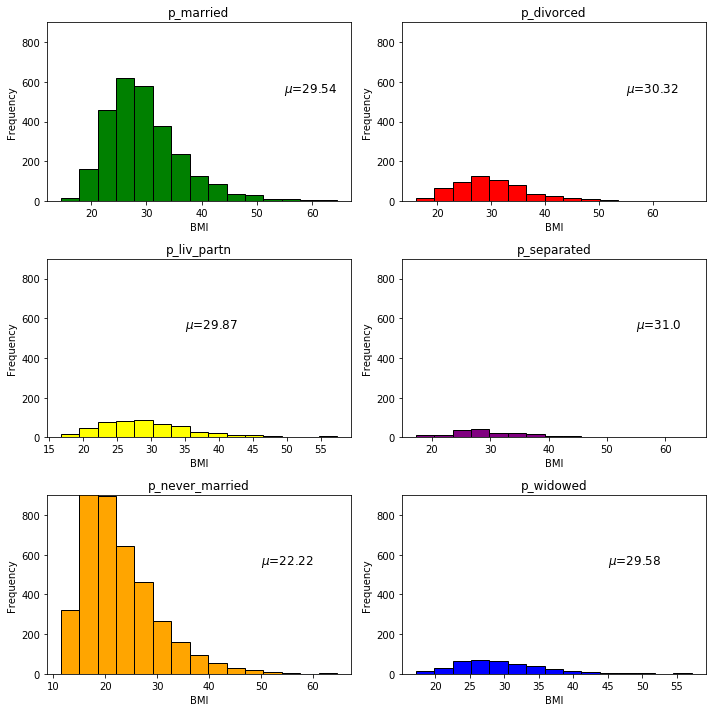

In [26]:
#BMI distributions in marital

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(3,2,1)
ax1.set_title("p_married")
ax1.set_xlabel("BMI")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 900])
ax1.text(55, 550, r'$\mu$='+str(round(df[df['p_marl']=='p_married']['bmi'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist( df[df['p_marl']=='p_married']['bmi'], color='green', bins=15,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(3,2,2)
ax2.set_title("p_divorced")
ax2.set_xlabel("BMI")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 900])
ax2.text(55, 550, r'$\mu$='+str(round(df[df['p_marl']=='p_divorced']['bmi'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(df[df['p_marl']=='p_divorced']['bmi'], color='red', bins=15,
                                     edgecolor='black', linewidth=1)

ax1 = fig.add_subplot(3,2,3)
ax1.set_title("p_liv_partn")
ax1.set_xlabel("BMI")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 900])
ax1.text(35, 550, r'$\mu$='+str(round(df[df['p_marl']=='p_liv_partn']['bmi'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist( df[df['p_marl']=='p_liv_partn']['bmi'], color='yellow', bins=15,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(3,2,4)
ax2.set_title("p_separated")
ax2.set_xlabel("BMI")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 900])
ax2.text(55, 550, r'$\mu$='+str(round(df[df['p_marl']=='p_separated']['bmi'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(df[df['p_marl']=='p_separated']['bmi'], color='purple', bins=15,
                                     edgecolor='black', linewidth=1)

ax1 = fig.add_subplot(3,2,5)
ax1.set_title("p_never_married")
ax1.set_xlabel("BMI")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 900])
ax1.text(50, 550, r'$\mu$='+str(round(df[df['p_marl']=='p_never_married']['bmi'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist( df[df['p_marl']=='p_never_married']['bmi'], color='orange', bins=15,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(3,2,6)
ax2.set_title("p_widowed")
ax2.set_xlabel("BMI")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 900])
ax2.text(45, 550, r'$\mu$='+str(round(df[df['p_marl']=='p_widowed']['bmi'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(df[df['p_marl']=='p_widowed']['bmi'], color='blue', bins=15,
                                     edgecolor='black', linewidth=1)

plt.tight_layout()

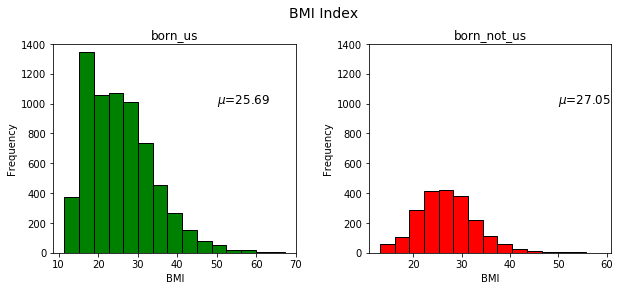

In [27]:
#BMI distributions in born
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("BMI Index", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("born_us")
ax1.set_xlabel("BMI")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1400])
ax1.text(50, 1000, r'$\mu$='+str(round(df[df['p_born']=='born_us']['bmi'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist( df[df['p_born']=='born_us']['bmi'], color='green', bins=15,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("born_not_us")
ax2.set_xlabel("BMI")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1400])
ax2.text(50, 1000, r'$\mu$='+str(round(df[df['p_born']=='born_not_us']['bmi'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(df[df['p_born']=='born_not_us']['bmi'], color='red', bins=15,
                                     edgecolor='black', linewidth=1)

# on average people born in us are ideal BMI's
# people not born in US are slightly over weight

Text(0, 0.5, 'BMI')

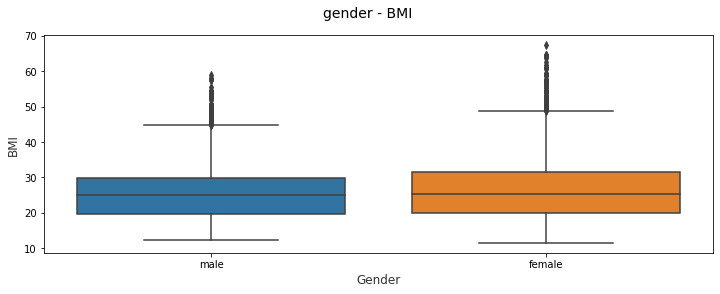

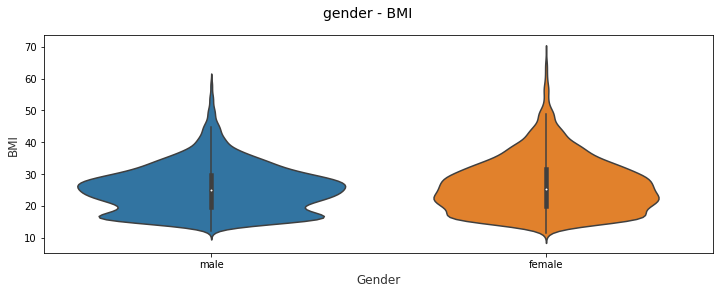

In [28]:
# let's look at distribution using box plots and violin plots
#gender,race,born,marl

# gender
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('gender - BMI', fontsize=14)

sns.boxplot(data=df,  
            x="p_gen", 
            y="bmi", 
            ax=ax)

ax.set_xlabel("Gender",size=12,alpha=0.8)
ax.set_ylabel("BMI",size=12,alpha=0.8)


f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('gender - BMI', fontsize=14)

sns.violinplot(data=df,  
            x="p_gen", 
            y="bmi", 
            ax=ax)

ax.set_xlabel("Gender",size=12,alpha=0.8)
ax.set_ylabel("BMI",size=12,alpha=0.8)
# most of them fall in the range
#there are outliers

Text(0, 0.5, 'BMI')

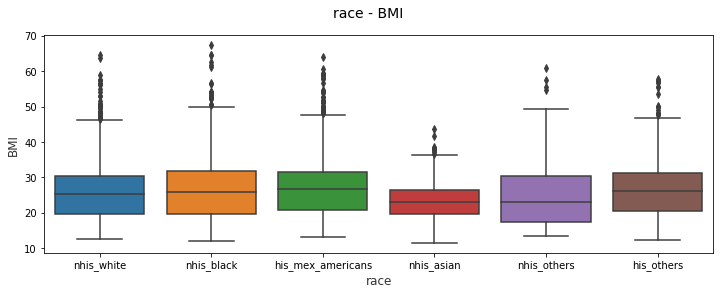

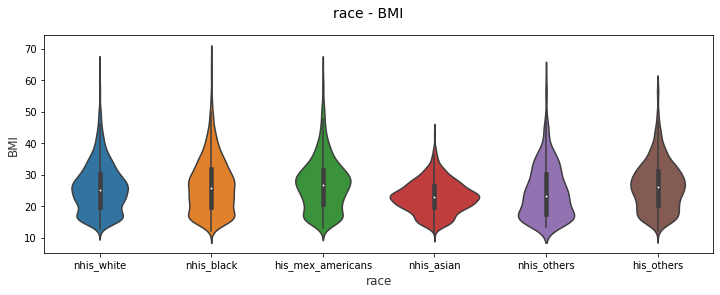

In [29]:

# race
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('race - BMI', fontsize=14)

sns.boxplot(data=df,  
            x="p_race", 
            y="bmi", 
            ax=ax)

ax.set_xlabel("race",size=12,alpha=0.8)
ax.set_ylabel("BMI",size=12,alpha=0.8)


f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('race - BMI', fontsize=14)

sns.violinplot(data=df,  
            x="p_race", 
            y="bmi", 
            ax=ax)

ax.set_xlabel("race",size=12,alpha=0.8)
ax.set_ylabel("BMI",size=12,alpha=0.8)

#mexican americans violin plot is concaved slightly above 25
#asian plot are concaved slightly less then ideal
#hot hispanic others are concaved veru much less then ideal

Text(0, 0.5, 'BMI')

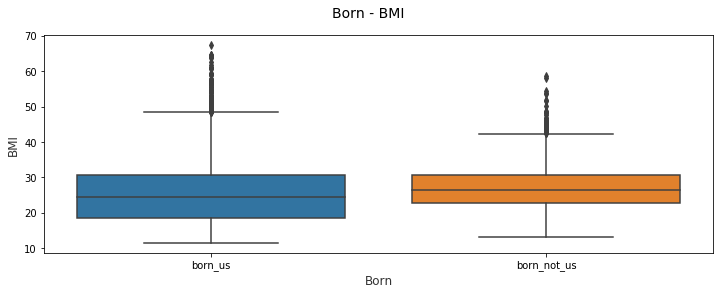

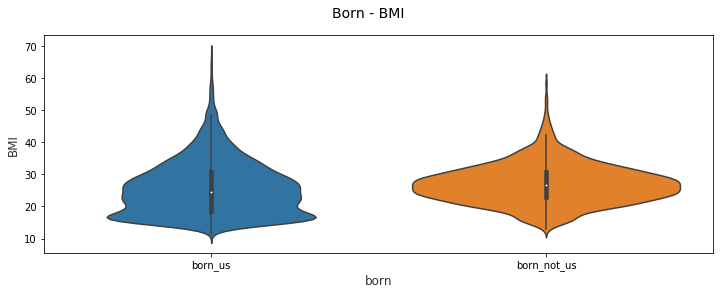

In [30]:
# born
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Born - BMI', fontsize=14)

sns.boxplot(data=df,  
            x="p_born", 
            y="bmi", 
            ax=ax)

ax.set_xlabel("Born",size=12,alpha=0.8)
ax.set_ylabel("BMI",size=12,alpha=0.8)


f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Born - BMI', fontsize=14)

sns.violinplot(data=df,  
            x="p_born", 
            y="bmi", 
            ax=ax)

ax.set_xlabel("born",size=12,alpha=0.8)
ax.set_ylabel("BMI",size=12,alpha=0.8)
# if we look at the trend person's born in us are in the ideal range
#not born in us are concaved mostly more then ideal

Text(0, 0.5, 'BMI')

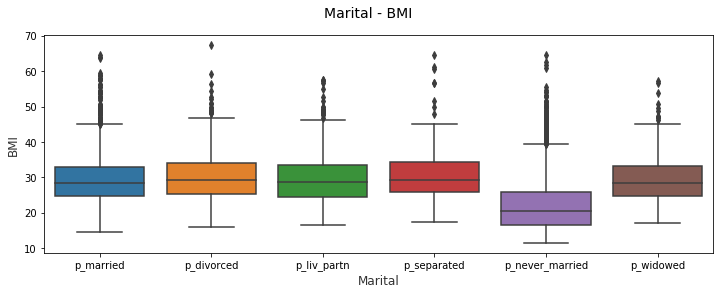

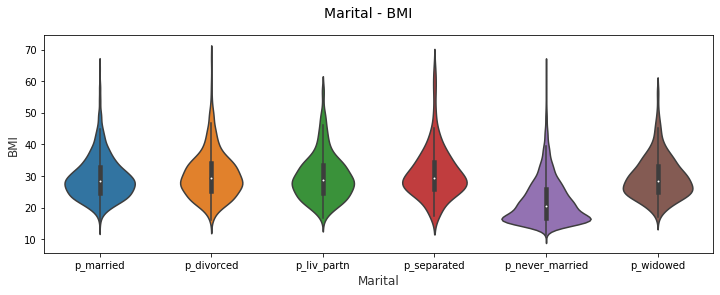

In [31]:
#marital
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Marital - BMI', fontsize=14)

sns.boxplot(data=df,  
            x="p_marl", 
            y="bmi", 
            ax=ax)

ax.set_xlabel("Marital",size=12,alpha=0.8)
ax.set_ylabel("BMI",size=12,alpha=0.8)


f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Marital - BMI', fontsize=14)

sns.violinplot(data=df,  
            x="p_marl", 
            y="bmi", 
            ax=ax)

ax.set_xlabel("Marital",size=12,alpha=0.8)
ax.set_ylabel("BMI",size=12,alpha=0.8)

# it's better to skim the outliers generally more then 50 BMI's are fairly less in number
# but the outliers are distributed across all the categories
#think about it

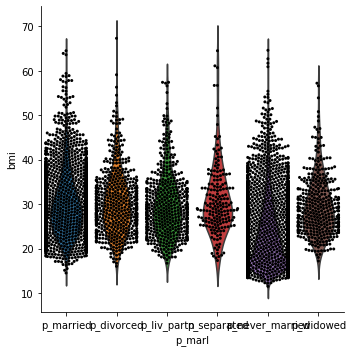

In [32]:
g = sns.catplot(x="p_marl", y="bmi", kind="violin", inner=None, data=df)
sns.swarmplot(x="p_marl", y="bmi", color="k", size=3, data=df, ax=g.ax);

Text(0.5, 1.0, 'Age vs Edu vs BMI')

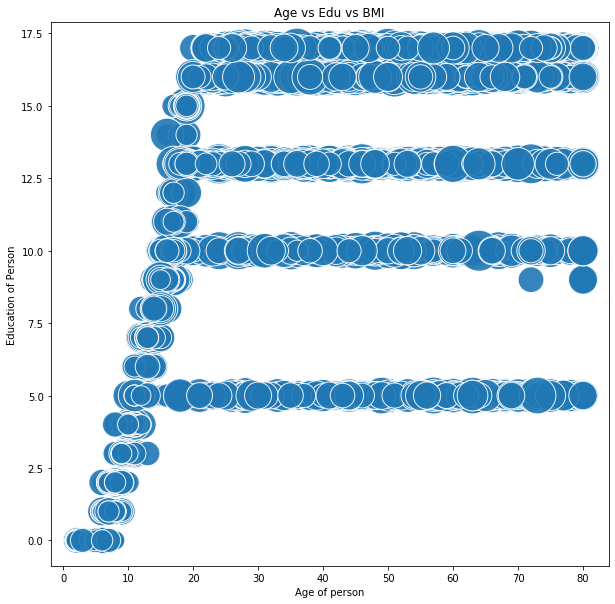

In [33]:
# 3D plots tri-variate analysis
# using seaborn size parameter 
fig,axes=plt.subplots(figsize=(10,10))
plt.scatter(x=df['p_yr'],
           y= df ['p_edu'],
           s=df['bmi']*25,
           alpha =0.9,
           edgecolors ='w')

plt.xlabel('Age of person')
plt.ylabel('Education of Person')
plt.title('Age vs Edu vs BMI')

#so looking at the trend 
#as Age of the person is more the BMI is increasing [bubbles]
# as people tend to be more educated [there age also increases, so as there BMI]

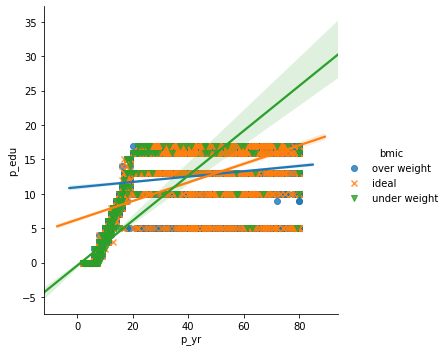

In [34]:
#seaborn color parameters        
# Plot data and regression model fits across a FacetGrid.
lp = sns.lmplot(data=df,
                x='p_yr', 
                y='p_edu', 
                hue='bmic',markers=["o", "x","v"])

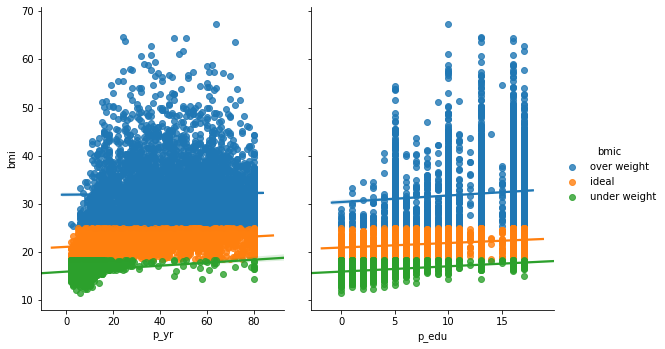

In [35]:
sns.pairplot(df, x_vars=["p_yr", "p_edu"], y_vars=["bmi"],
             hue="bmic", height=5, aspect=.8, kind="reg");

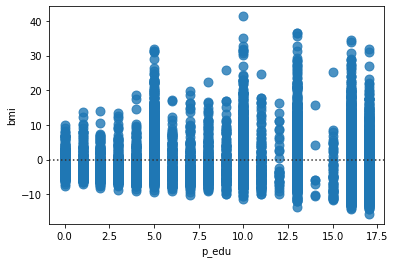

In [36]:
sns.residplot(x="p_edu", y="bmi", data=df,
              scatter_kws={"s": 80});

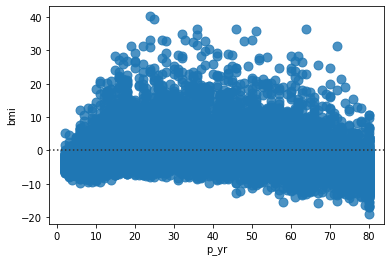

In [37]:
'''function can be a useful tool for checking 
whether the simple regression model is appropriate for a dataset. 
It fits and removes a simple linear regression and then plots the residual values for each observation.
Ideally, these values should be randomly scattered around y = 0:'''

sns.residplot(x="p_yr", y="bmi", data=df,
              scatter_kws={"s": 80});


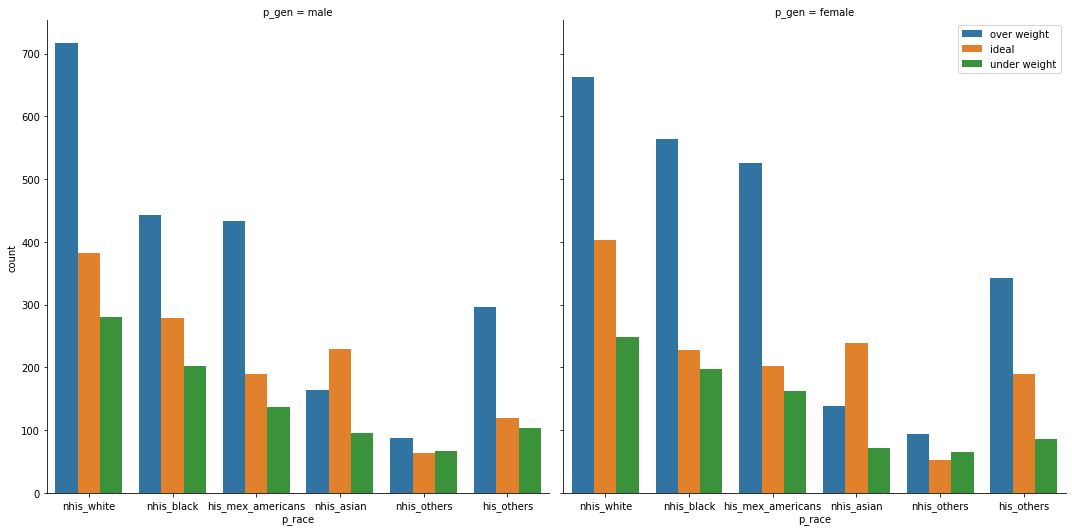

In [38]:
# 3 Discrete Categorical Attributes
#gender vs race vs BMI
#X axis is Race
#color is BMI type
#columns is Gender
sns.catplot(x='p_race',
              hue ='bmic',
              col ='p_gen',
              data =df,
              kind ='count',legend=False
             )
plt.tight_layout(rect=(0,0,1.5,1.5))
plt.legend()

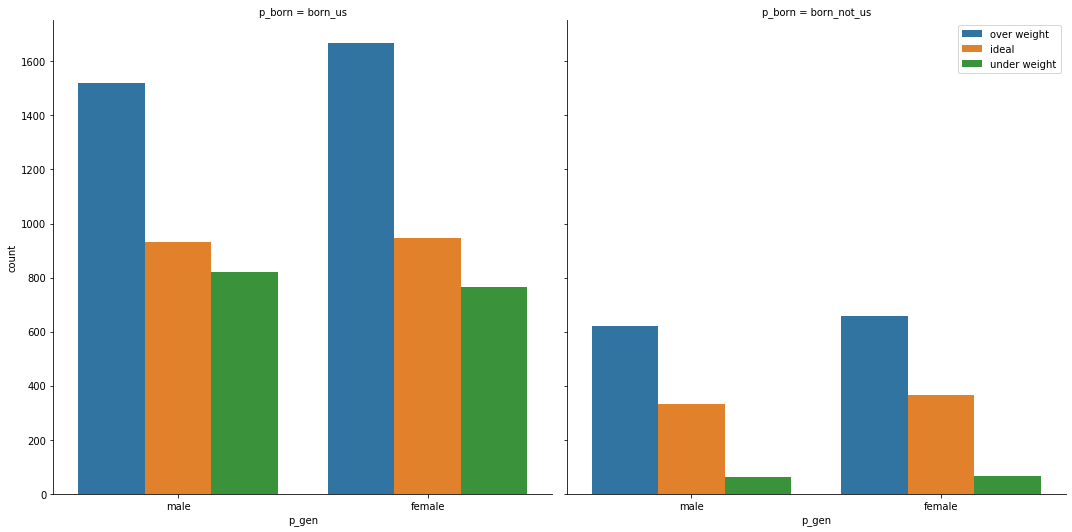

In [39]:
#gender vs born vs BMI
#X axis is gender
#color is BMI type
#columns is born
sns.catplot(x='p_gen',
              hue ='bmic',
              col ='p_born',
              data =df,
              kind ='count',legend=False
             )
plt.tight_layout(rect=(0,0,1.5,1.5))
plt.legend()

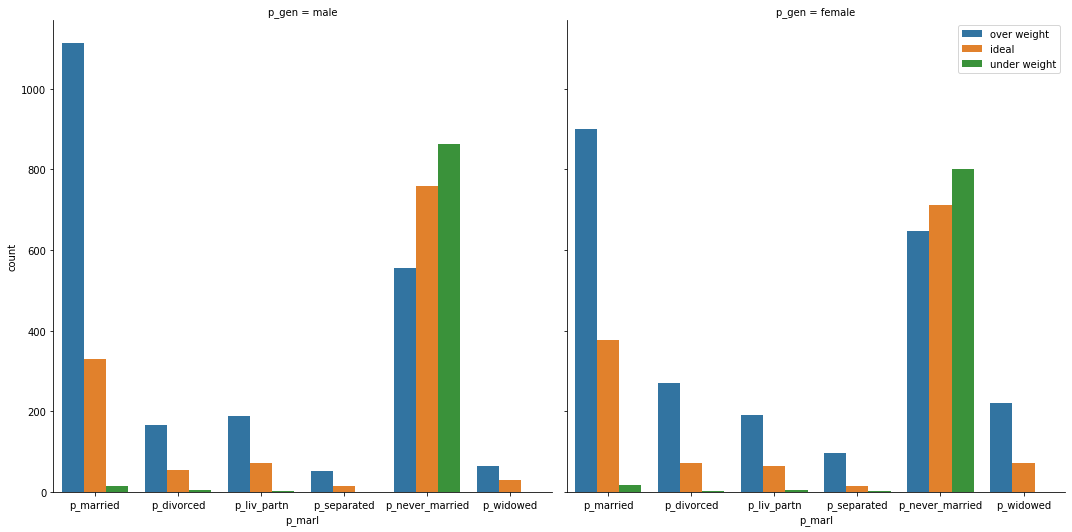

In [40]:
#gender vs marital vs BMI
#X axis is gender
#color is BMI type
#columns is marital
sns.catplot(x='p_marl',
              hue ='bmic',
              col ='p_gen',
              data =df,
              kind ='count',legend=False
             )
plt.tight_layout(rect=(0,0,1.5,1.5))
plt.legend()

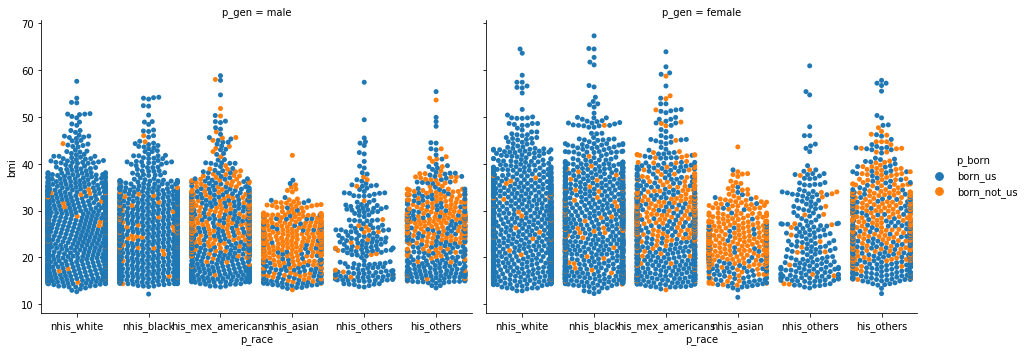

In [41]:
#4D plots
#it gives a lot of Information at once
#race,gender,bmi,person born 
sns.catplot(x="p_race", y="bmi", hue="p_born",
            col="p_gen", height=5,aspect=1.3,
            kind="swarm", data=df);

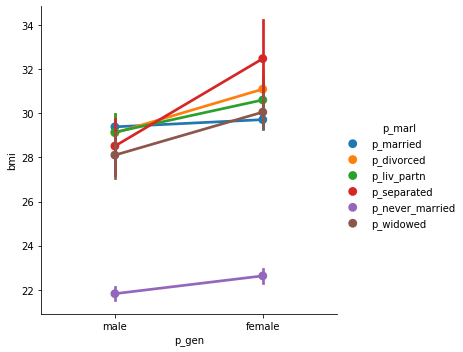

In [42]:
#now let's compare how the mean BMI's of each group varies within the own group
# this gives us the important point saying that male have less bmi then female in all the kind of variations
#point plots
sns.catplot(x="p_gen", y="bmi", hue="p_marl", kind="point", data=df);

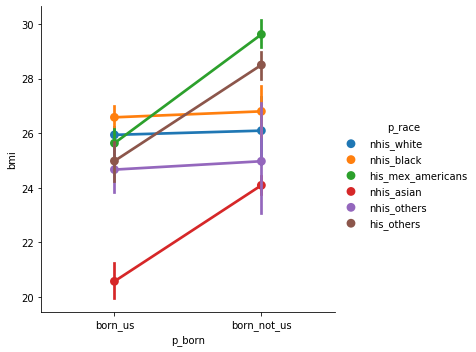

In [43]:
sns.catplot(x="p_born", y="bmi", hue="p_race", kind="point", data=df);
# if you compare withing poerson born and not born with bmi of race

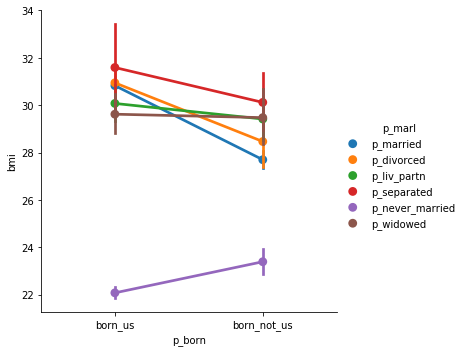

In [44]:
sns.catplot(x="p_born", y="bmi", hue="p_marl", kind="point", data=df);
# if you compare withing each marital status of the group person born in us have more bmi

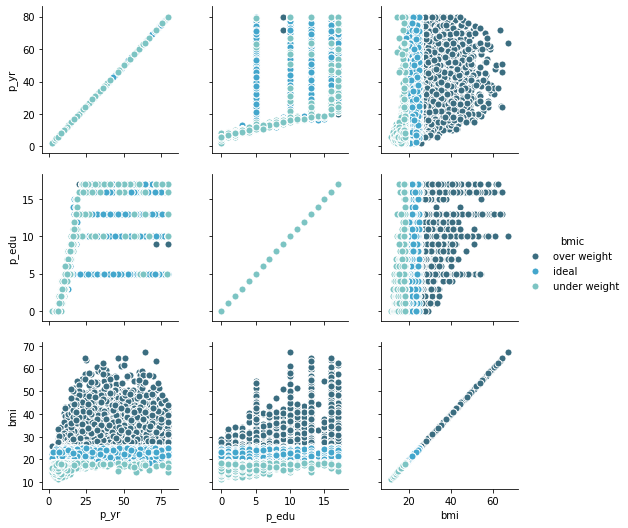

In [45]:
g = sns.PairGrid(df, hue="bmic", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();